In [68]:
options(repr.plot.width=8, repr.plot.height=5)
install.packages('nycflights13')
library(tidyverse)
library(nycflights13)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Lecture 6: Exploratory data analysis

<div style="border: 1px double black; padding: 10px; margin: 10px">

**After today's lecture you will:**
* Learn how to perform [exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) (EDA) using the tidyverse and ggplot.
* Understand the correct type(s) of plots for studying:
    - Discrete vs. continuous data
    - Variation (in a single) discrete or continuous variable
    - *Co*variation among two or more discrete or continuous variables
    
This lecture note corresponds to Chapters 11 and 12 of your book. 
</div>


    




## What is exploratory data analysis

<img src="https://upload.wikimedia.org/wikipedia/en/e/e9/John_Tukey.jpg" style="margin: 0 0 0 20px; float: right" />

> Procedures for analyzing data, techniques for interpreting the results of such procedures, ways of planning the gathering of data to make its analysis easier, more precise or more accurate, and all the machinery and results of (mathematical) statistics which apply to analyzing data.



## What is EDA (book version):

1. Generate questions about your data.
2. Search for answers by visualizing, transforming, and modelling your data.
3. Use what you learn to refine your questions and/or generate new questions.
4. (Return to #1).

Two types of questions are always useful for making discoveries within your data:

- What type of variation occurs within my variables?
- What type of covariation occurs between my variables?

## Variation
- Real-life variables change from measurement to measurement. 
- This is often true even if you measure the same thing twice!
- Each measurements has a small amount of error ("noise").
- The noise is different each time you take a measurement.

## Continuous vs. discrete
The appropriate visualization will depend on whether the data are:
- *Continuous*: they take on an infinite number of ordered values.
- *Discrete*: the take on one of a small number of values.

## 🤔 Quiz

Continuous or discrete?: `mpg$manufacturer`

<ol style="list-style-type: upper-alpha;">
    <li>Continuous</li>
    <li>Discrete</li>
    <li>Could be either</li>
</ol>

In [70]:
mpg$manufacturer %>% unique

[1] "audi"       "chevrolet"  "dodge"      "ford"       "honda"     
 [6] "hyundai"    "jeep"       "land rover" "lincoln"    "mercury"   
[11] "nissan"     "pontiac"    "subaru"     "toyota"     "volkswagen"

## 🤔 Quiz

Continuous or discrete?: `diamonds$price`

<ol style="list-style-type: upper-alpha;">
    <li>Continuous</li>
    <li>Discrete</li>
    <li>Could be either</li>
</ol>

In [72]:
diamonds$price %>% unique

[1]   326   327   334   335   336   337   338   339   340   342   344   345
   [13]   348   351   352   353   354   355   357   402   403   404   405   552
   [25]   553   554  2757  2759  2760  2761  2762  2763  2764  2765  2766  2767
   [37]  2768  2769  2770  2771  2772  2773  2774  2775  2776  2777  2778  2779
   [49]  2780  2781  2782  2783  2784  2787  2788  2789  2790  2791  2792  2793
   [61]  2794  2795  2796  2797  2798  2799  2800  2801  2802  2803  2804  2805
   [73]  2806  2807  2808  2809  2810  2811  2812   555   556  2813  2814  2815
   [85]  2816  2817  2818  2819  2820  2821  2822  2823  2824  2825  2826  2827
   [97]  2828  2829  2830  2831  2832  2833  2834  2835  2836  2837  2838  2839
  [109]  2840  2841  2842  2843  2844  2845  2846  2847  2848  2849  2850  2851
  [121]  2852  2853  2854  2855  2856   557  2857  2858  2859  2860  2861  2862
  [133]  2863  2864  2865  2866  2867  2868  2869  2870  2871  2872  2873  2874
  [145]  2875  2876  2877  2878  2879  2880  2881  2882  2883  2884  2885  2886
  [157]  2887  2888  2889  2890  2891  2892  2893  2894  2895  2896  2897  2898
  [169]  2899  2900  2901  2902  2903  2904  2905  2906  2907   558  2908  2909
  [181]  2910  2911  2912  2913  2914  2915  2916  2917  2918  2919  2920  2921
  [193]  2922  2923  2924  2925  2926  2927  2928  2929  2930  2931  2932  2933
  [205]  2934  2935  2936  2937  2938  2939  2940  2941  2942  2943  2944  2945
  [217]  2946  2947  2948  2949  2950  2951  2952  2953  2954  2955  2956  2958
  [229]  2959  2960  2961  2962  2963  2964  2965  2966  2967   559   560   561
  [241]  2968  2969  2970  2971  2972  2973  2974  2975  2976  2977  2978  2979
  [253]  2980  2981  2982  2984  2985  2986  2987  2988  2989  2990  2991  2992
  [265]  2993  2994  2995  2996  2997  2998  2999  3000  3001  3002  3003  3004
  [277]  3005  3006  3007  3008  3009  3010  3011  3012  3013  3014  3015  3016
  [289]  3017  3018  3019  3020  3023  3024  3025  3026  3027  3028  3030  3031
  [301]  3032  3033  3034  3035  3036  3037  3038  3039  3040  3041  3042  3043
  [313]  3044  3045  3046  3047  3048  3049  3050  3051  3052  3053  3054  3055
  [325]  3056  3057  3058  3059  3060  3061  3062  3063  3064  3065  3066  3067
  [337]  3068  3070  3071  3072  3073  3074  3075  3077  3078  3079  3080  3081
  [349]  3082  3083  3084  3085  3086  3087  3088  3089  3090  3091  3092  3093
  [361]  3095  3096  3097  3098  3099  3101  3102  3103  3104  3105  3107  3108
  [373]  3109  3110  3111  3112  3113  3114  3115  3116  3117  3118  3119  3120
  [385]  3121  3122  3123  3124  3125  3126  3127  3128  3129  3130  3131  3133
  [397]  3134  3135  3136  3137  3138  3139  3140  3141  3142  3143  3144  3145
  [409]  3146  3148  3149  3150  3151  3152  3153  3154  3156  3157  3158  3159
  [421]  3160  3161  3162  3163  3164  3165  3166  3167  3168  3169  3170  3171
  [433]  3172  3173  3174  3175  3176   562  3177  3178  3179  3180  3181  3182
  [445]  3183  3184  3185  3187  3188  3189  3190  3191  3192  3193  3194  3195
  [457]  3196  3197  3198  3199  3200  3201  3203  3204  3205  3206  3207  3208
  [469]  3209  3210  3211  3212  3213  3214  3215  3216  3217  3218  3219  3220
  [481]  3222  3223  3224  3225  3226  3228  3229  3230  3231  3234  3235  3236
  [493]  3237  3238  3239  3240  3241  3242  3243  3245  3246   563   564   565
  [505]  3247  3248  3249  3250  3251  3252  3253  3254  3255  3256  3257  3258
  [517]  3259  3260  3261  3262  3263  3264  3265  3266  3267  3268  3269  3270
  [529]  3271  3272  3273  3274  3275  3276  3277  3278  3279  3280  3281  3282
  [541]  3283  3284  3285  3286  3287  3288  3290  3291  3292  3293  3294  3295
  [553]  3296  3297  3298  3299  3300  3301  3302  3303  3304  3306  3307  3308
  [565]  3309   566  3310  3311  3312  3313  3314  3315  3316  3317  3318  3319
  [577]  3321  3322  3323  3324  3325  3326  3327  3328  3329  3330  3332  3333
  [589]  3334  3335  3336  3337  3338  3340  3342  3343  3344  3345  3346  3347
  [6

## 🤔 Quiz

Continuous or discrete?: `flights$carrier`

<ol style="list-style-type: upper-alpha;">
    <li>Continuous</li>
    <li>Discrete</li>
    <li>Could be either</li>
</ol>

In [73]:
flights$carrier %>% unique

[1] "UA" "AA" "B6" "DL" "EV" "MQ" "US" "WN" "VX" "FL" "AS" "9E" "F9" "HA" "YV"
[16] "OO"

## Measuring the speed of light
`morley` is a built-in dataset measuring the speed of light.

In [74]:
print(as_tibble(morley))

# A tibble: 100 × 3
    Expt   Run Speed
   <int> <int> <int>
 1     1     1   850
 2     1     2   740
 3     1     3   900
 4     1     4  1070
 5     1     5   930
 6     1     6   850
 7     1     7   950
 8     1     8   980
 9     1     9   980
10     1    10   880
# … with 90 more rows


In [75]:
?morley

Here we're measuring the speed of light, an absolute, unchanging, physical constant:

$$c = 299,792,458 \, m/s.$$

But we get a different value with every experiment. Why?

## Visualizing variation in our data

In order to understand how accurately we measured the speed of light, we first need to assess its *variation*. Since the measurement is continuous, we have several options:

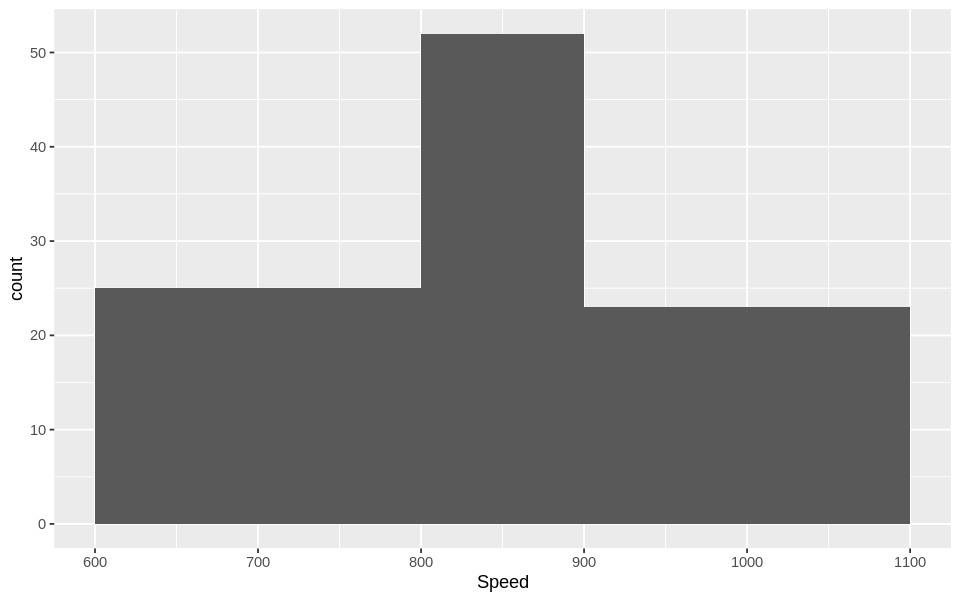

In [85]:
# plot a histogram
ggplot(morley, aes(x=Speed)) +
  geom_histogram(breaks = c( 600, 800, 900, 1100))

In [82]:
?geom_histogram

## What is a histogram?
What does a histogram actually represent? We will make one by hand.

In [88]:
# make a histogram by hand.
v = c(1:10)
print(v)
cut(v, breaks = c(1, 5, 10))

 [1]  1  2  3  4  5  6  7  8  9 10


[1] <NA>   (1,5]  (1,5]  (1,5]  (1,5]  (5,10] (5,10] (5,10] (5,10] (5,10]
Levels: (1,5] (5,10]

In [89]:
seq(600, 1100, 50)

[1]  600  650  700  750  800  850  900  950 1000 1050 1100

In [ ]:
df1 <- morley %>% 
  mutate(bin = cut(Speed, breaks = seq(600, 1100, 50))) %>%
    print

In [91]:
morley$Speed %>% unique

[1]  850  740  900 1070  930  950  980  880 1000  650  760  810  960  940  800
[16]  840  830  790  860  720  620  970  910  870  890  820  770  750  920  780

In [95]:
df1$bin %>% unique

[1] (800,850]          (700,750]          (850,900]          (1.05e+03,1.1e+03]
[5] (900,950]          (950,1e+03]        (600,650]          (750,800]         
10 Levels: (600,650] (650,700] (700,750] (750,800] (800,850] ... (1.05e+03,1.1e+03]

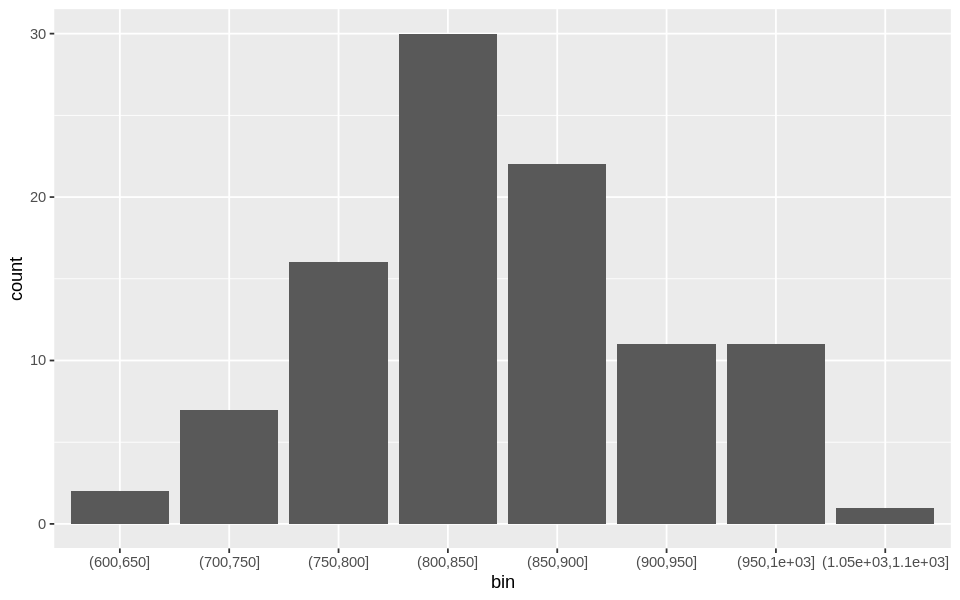

In [96]:
ggplot(df1, aes(x = bin)) +
  geom_bar()

## Adjusting a histogram
Any dataset can be plotted using multiple different histograms. For example:

In [ ]:
# adjust the bins/binwidth/breaks in a histogram

There is no one right answer for "how many different bins" -- different values tell different stories about your variable
- Larger values of bins are more detailed but have higher *variance*
- Smaller values are smoother but have higher *bias*

## Follow-up questions
Now that we can see variation in our data, what sort of follow-up questions should we ask?

- Which values are the most common? Why?

- Which values are rare? Why? Does that match your expectations?

- Can you see any unusual patterns? What might explain them?

## The diamonds dataset
Let's look at a different dataset built into R:

In [97]:
print(diamonds)

# A tibble: 53,940 × 10
   carat cut       color clarity depth table price     x     y     z
   <dbl> <ord>     <ord> <ord>   <dbl> <dbl> <int> <dbl> <dbl> <dbl>
 1  0.23 Ideal     E     SI2      61.5    55   326  3.95  3.98  2.43
 2  0.21 Premium   E     SI1      59.8    61   326  3.89  3.84  2.31
 3  0.23 Good      E     VS1      56.9    65   327  4.05  4.07  2.31
 4  0.29 Premium   I     VS2      62.4    58   334  4.2   4.23  2.63
 5  0.31 Good      J     SI2      63.3    58   335  4.34  4.35  2.75
 6  0.24 Very Good J     VVS2     62.8    57   336  3.94  3.96  2.48
 7  0.24 Very Good I     VVS1     62.3    57   336  3.95  3.98  2.47
 8  0.26 Very Good H     SI1      61.9    55   337  4.07  4.11  2.53
 9  0.22 Fair      E     VS2      65.1    61   337  3.87  3.78  2.49
10  0.23 Very Good H     VS1      59.4    61   338  4     4.05  2.39
# … with 53,930 more rows


This is a dataset of price, quality, and other characteristics for 54k diamonds.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


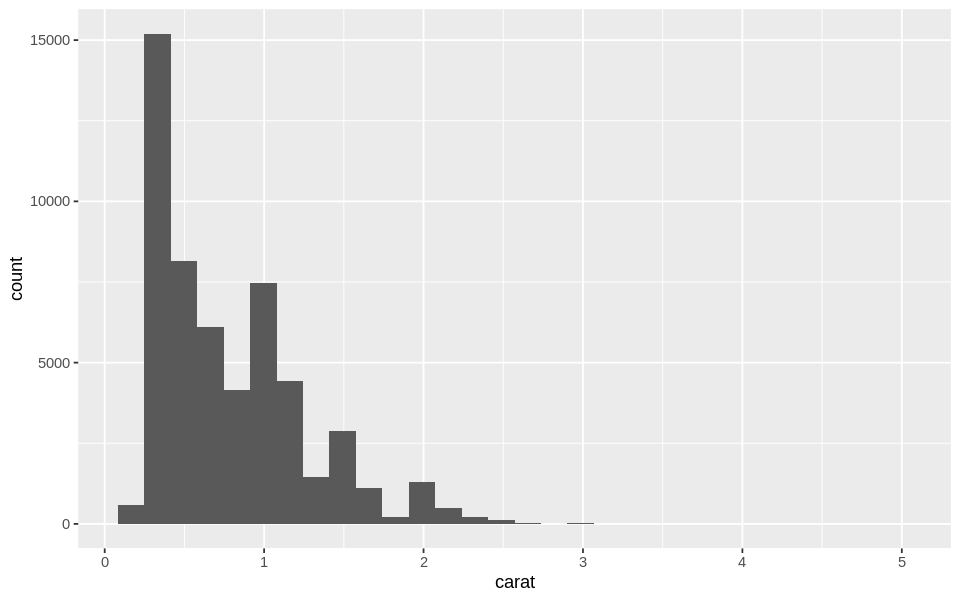

In [98]:
# histogram of carat
diamonds %>% ggplot(aes(x = carat)) +
  geom_histogram()

## 🤔 Quiz

What can be said about the distribution of `carat` in the `diamonds` dataset? (Check all that apply.)

<ol style="list-style-type: upper-alpha;">
    <li>Almost all diamonds are &lt; 3 carats.</li>
    <li>Missing values are encoded as <code>carat = -1</code>.</li>
    <li>Diamond makers appear to prefer diamonds that are rounded to the nearest .1 or .5 carat.
    <li>There are more diamonds between 0 and 1 carats than &gt;1 carats.</li>
    <li>There are more diamonds that measure 2.0 carats than there are that measure between 1.8 and 2.0 carats.</li>
</ol>

(Hint: plot a histogram, and try out different values for `bins`, `breaks`, or, `binwidth`.)

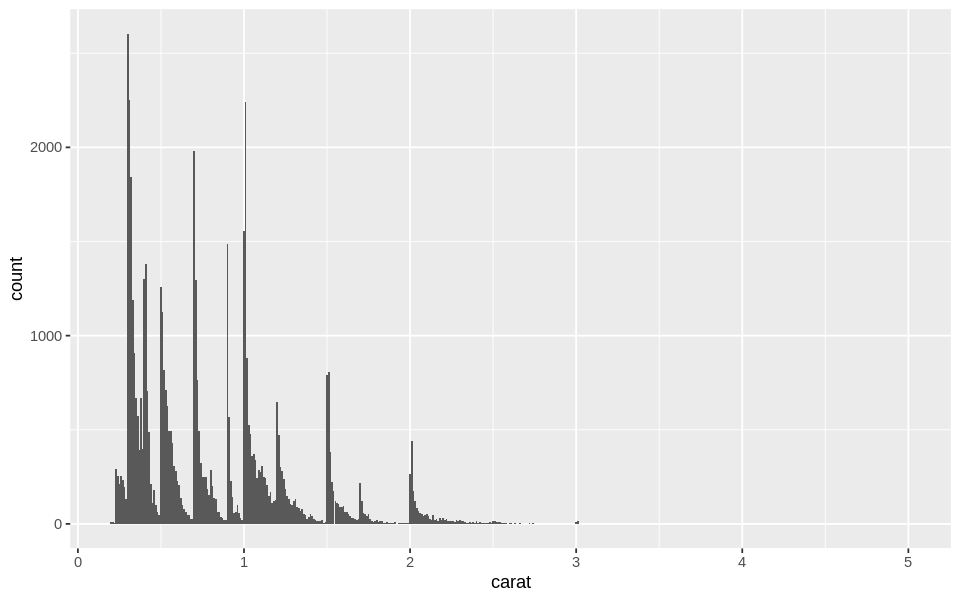

In [100]:
# more histograms of carat
diamonds %>% ggplot(aes(x = carat)) +
  geom_histogram(binwidth = 0.01)

## Unusual values (outliers)
Outliers are "unusual" observations. 
- Sometimes they are due to data entry errors.
- Sometimes they are important for other reasons. 

## Visualizing the distribution of a discrete variable
For a discrete variable, generally the only thing we're interested in is the count of each different value that the variable can assume. For this, something like a bar plot is often used:

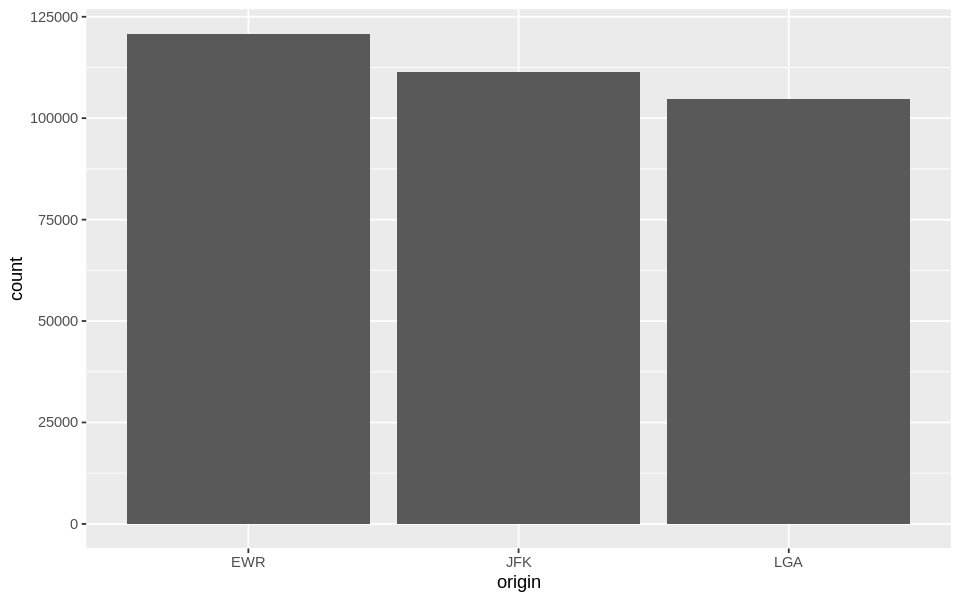

In [101]:
# counts of number of different origin airports (geom_bar)

flights %>% ggplot(aes(x = origin)) +
  geom_bar()

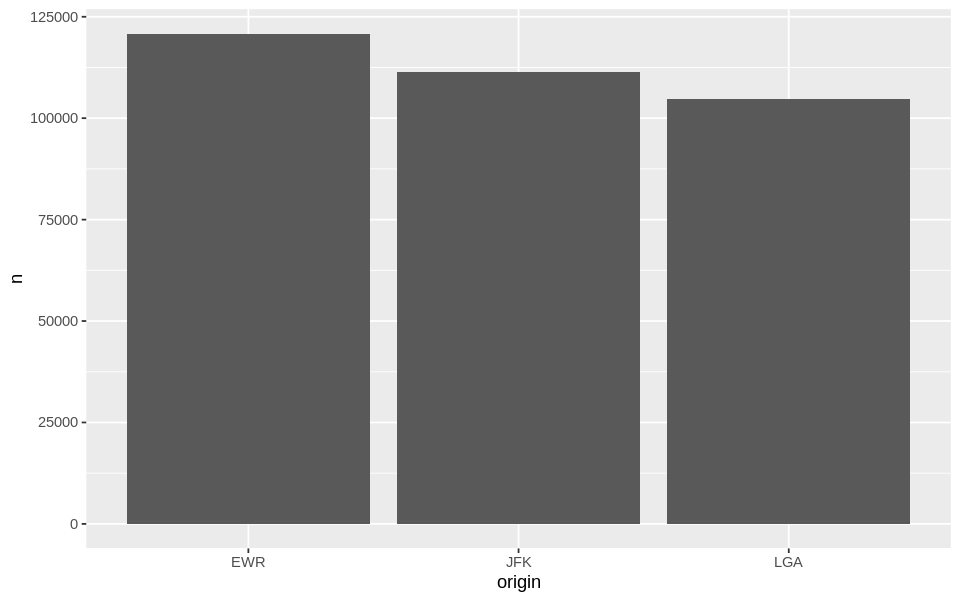

In [106]:
flights %>% count(origin) %>% ggplot(aes(x = origin, y = n)) +
  geom_bar(stat='identity')

## Pie charts
Many people think you should not use pie charts. The left-hand circle has unit area. How many times larger is the second circle?

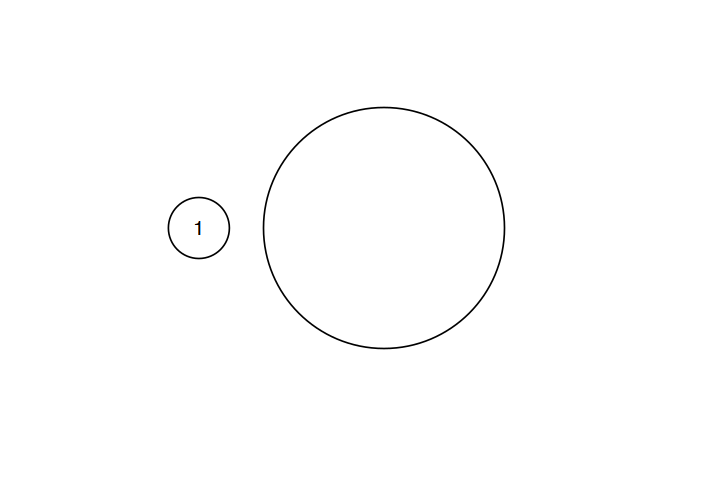

## Discrete variables with many values
Sometimes a discrete variable can take on a lot of values, such that it's not practical to plot its entire distribution. For example:

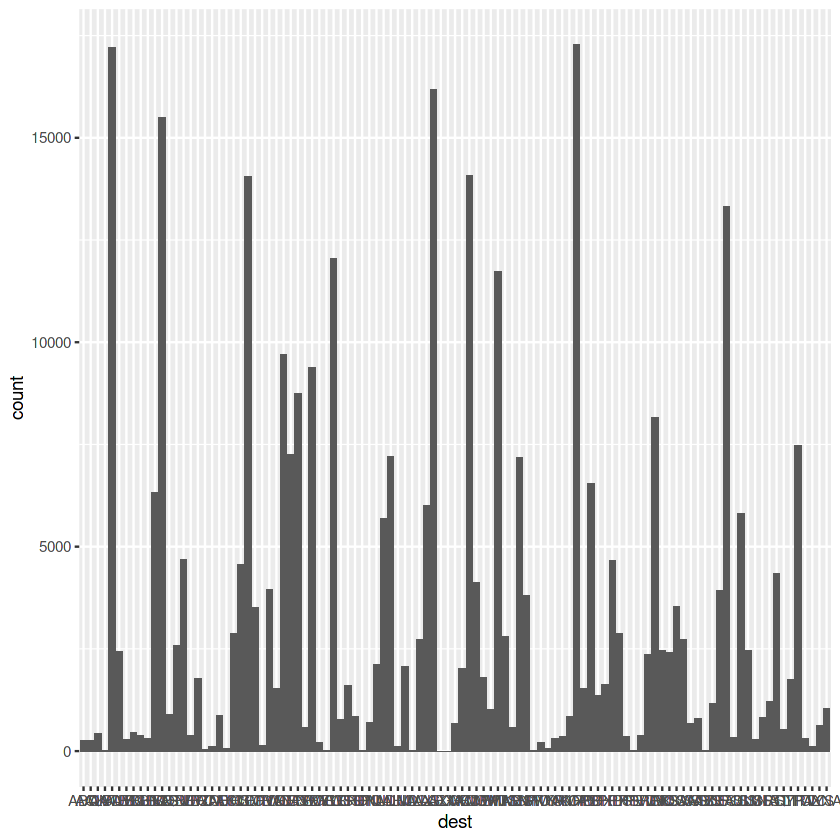

In [ ]:
ggplot(flights) + geom_bar(aes(x = dest))

In this case we can reduce the data in some way, for example, only plotting the most common airports:

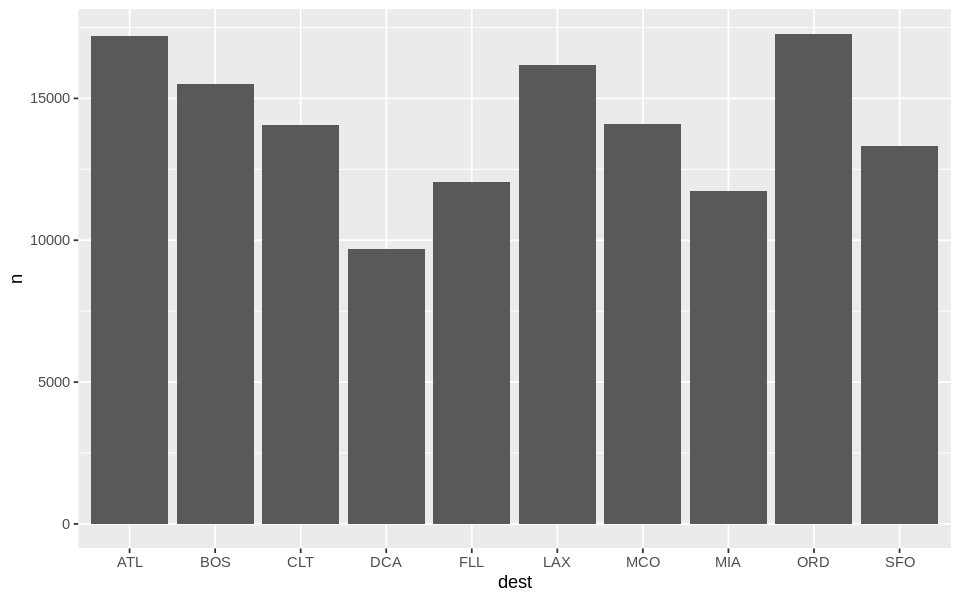

In [112]:
# lump flight destinations into top 10 + other

flights %>% count(dest) %>% arrange(-n) %>% head(10) %>%
  ggplot(aes(x = dest, y = n)) + geom_bar(stat='identity')

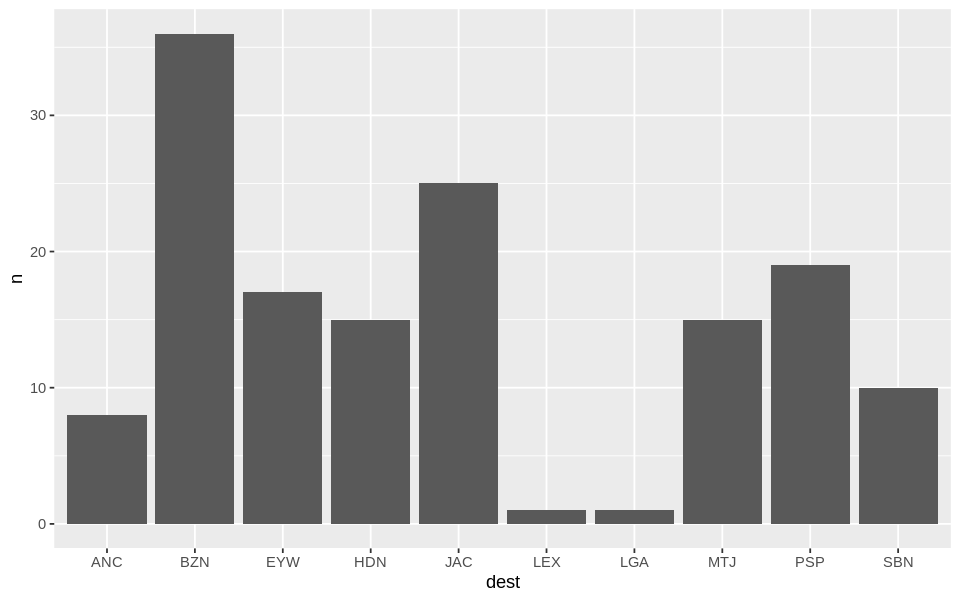

In [113]:
flights %>% count(dest) %>% arrange(n) %>% head(10) %>%
  ggplot(aes(x = dest, y = n)) + geom_bar(stat = 'identity')

(We'll learn more strategies like this when we study categorical data after the midterm.)

## Covariation
**Covariation** is when multiple variables vary together in a similar way. Covariation is everwhere, e.g.:
- Height and weight
- Political preference and religion
- Income this year vs. income last year
- Etc.

One of the best way to spot covariation is to visualize the "joint distribution" of both variables.

When studying covariation among two variables, there are three possibilities, depending on whether the variables are continuous, discrete, or a mixture.

## Continuous and discrete 
With one continuous and one discrete variable, there are several choices:
- Box-and-whisker plot
- Multiple/colored histograms

Let's study covariation of `cut` and `price` in the `diamonds` data set.

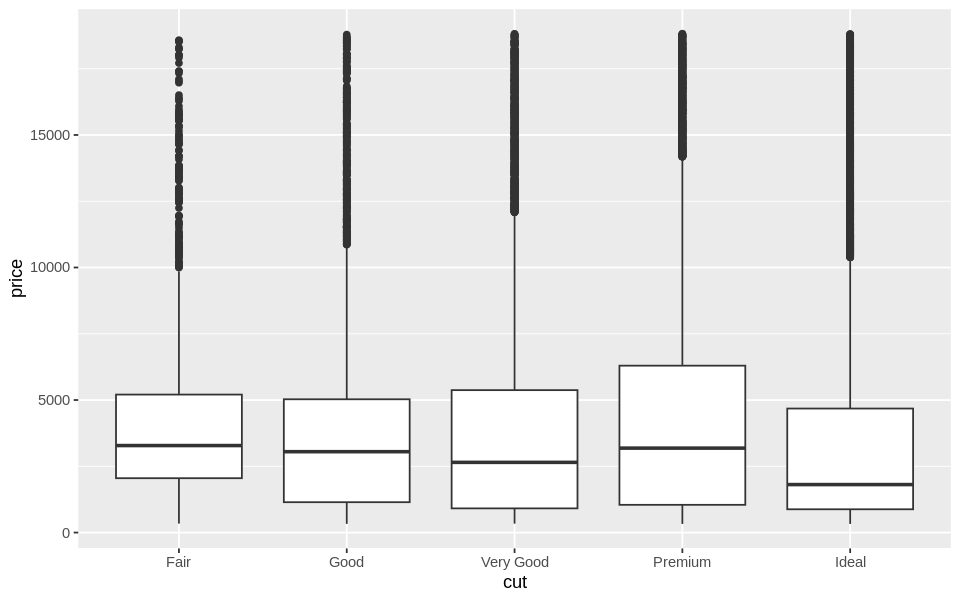

In [115]:
# boxplot cut vs price
diamonds %>% ggplot(aes(x = cut, y = price)) +
  geom_boxplot()

## Two discrete variables
To study covariation between two discrete variables, we can count the number of observations for each combination of values:

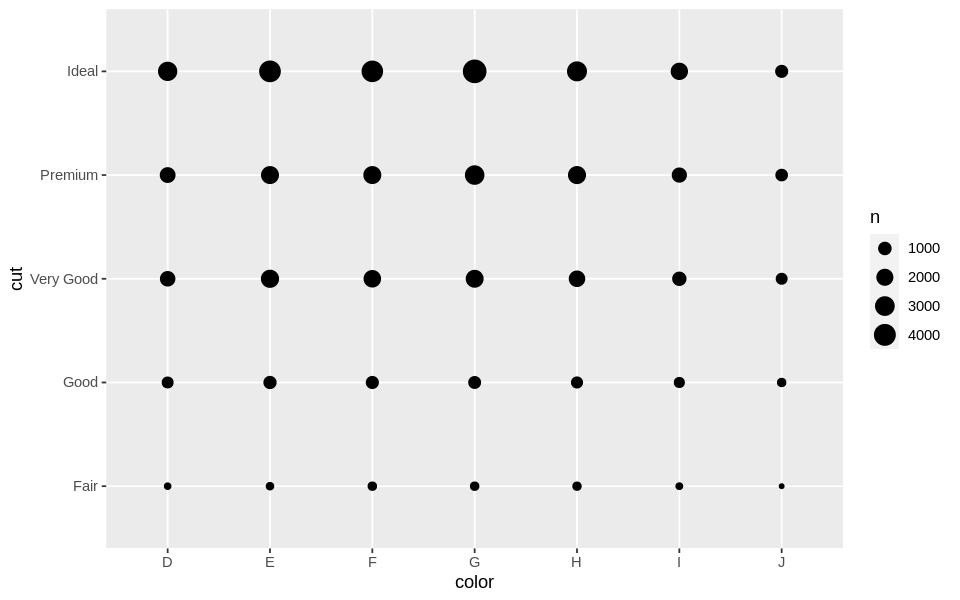

In [116]:
# geom_count to count the number of values for color and cut
diamonds %>% ggplot(aes(x = color, y = cut)) + 
  geom_count()

Another type of plot you will see often (especially in bio) is a heat map:

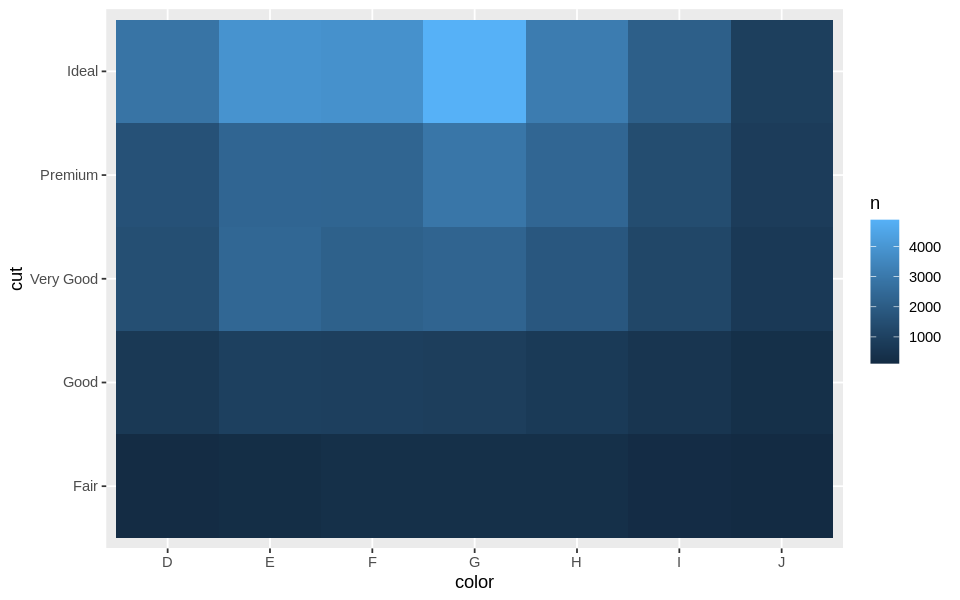

In [118]:
# geom_tile to count the number of values for color and cut
diamonds %>% count(color, cut) %>% ggplot(aes(x = color, y = cut, fill = n)) +
  geom_tile()

In [119]:
diamonds %>% count(color, cut)

color,cut,n
<ord>,<ord>,<int>
D,Fair,163
D,Good,662
D,Very Good,1513
D,Premium,1603
D,Ideal,2834
E,Fair,224
E,Good,933
E,Very Good,2400
E,Premium,2337


## Two continuous variables
Finally, if we're studying the covariation between two continuous variables, we have several options:
- Scatter plot (`geom_point`)
- Binning (`geom_bin2d`/`geom_hex`)
- Contour/bivariate density (`geom_density_2d`)

In [ ]:
# different geoms for carat vs. price

## Millenials
Let's use these techniques to explore a data set released by the [Pew Research Center](https://www.pewsocialtrends.org/2010/02/24/millennials-confident-connected-open-to-change/) on ... millennials!

![millennials](https://images2.minutemediacdn.com/image/upload/c_crop,h_1189,w_2119,x_0,y_225/f_auto,q_auto,w_1100/v1561494201/shape/mentalfloss/586493-istock-862201574.jpg)

In [ ]:
load(url('https://datasets.stats306.org/mil.RData'))
mil

age,state,q1,q8a,q8b,q8c,q8d,q8e,q8f,q8g,⋯,q44g,q44i,q45a,q46,employ,lwp,finan,home2,educ,health
<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
28,NY,Very happy,Very important but not the most,Very important but not the most,Very important but not the most,Very important but not the most,Very important but not the most,Not important,Very important but not the most,⋯,NA,NA,No,NA,Full-time,NA,No,Rent,"Some college, no 4-year degree (including associate degree)",Covered by health insurance
33,NE,Very happy,Not important,One of the most important things,One of the most important things,Very important but not the most,Very important but not the most,Not important,One of the most important things,⋯,NA,NA,Yes,1,Part-time,NA,No,NA,"Some college, no 4-year degree (including associate degree)",Covered by health insurance
45,IN,Pretty happy,Somewhat important,One of the most important things,Somewhat important,One of the most important things,Somewhat important,Not important,Somewhat important,⋯,Yes,No,No,NA,Not employed,Lived with current spouse before married,NA,NA,"College graduate (B.S., B.A., or other 4-year degree)",Covered by health insurance
66,IN,Very happy,Very important but not the most,Very important but not the most,Very important but not the most,Very important but not the most,Somewhat important,Not important,Very important but not the most,⋯,NA,NA,No,NA,Part-time,NA,NA,NA,High school incomplete (Grades 9-11),Covered by health insurance
52,VA,Very happy,One of the most important things,Very important but not the most,Very important but not the most,One of the most important things,Somewhat important,Not important,Very important but not the most,⋯,Yes,Yes,No,NA,Full-time,Lived with both current spouse and someone else,NA,NA,"College graduate (B.S., B.A., or other 4-year degree)",Covered by health insurance
VOL DON'T KNOW/REFUSED,MD,Very happy,Somewhat important,One of the most important things,One of the most important things,Very important but not the most,Somewhat important,Not important,(VOL) Don't know/Refused,⋯,NA,Yes,No,NA,Not employed,NA,NA,NA,"Some college, no 4-year degree (including associate degree)",Covered by health insurance
60,PA,Pretty happy,Not important,One of the most important things,One of the most important things,One of the most important things,One of the most important things,Not important,One of the most important things,⋯,NA,NA,No,NA,Not employed,NA,NA,NA,"Some college, no 4-year degree (including associate degree)",Covered by health insurance
54,NC,Not too happy,Very important but not the most,Very important but not the most,Very important but not the most,One of the most important things,Very important but not the most,Not important,Very important but not the most,⋯,NA,No,Yes,1,Full-time,NA,NA,NA,High school graduate (Grade 12 or GED certificate),Covered by health insurance
48,FL,Pretty happy,Somewhat important,One of the most important things,One of the most important things,One of the most important things,Very important but not the most,Not important,Very important but not the most,⋯,No,No,No,NA,Not employed,NA,NA,NA,"Some college, no 4-year degree (including associate degree)",Covered by health insurance


Each column of the data corresponds to one of the question asked during the survey. You can find the full script [here](https://docs.google.com/file/d/14U2-rS_ljS7kH97PMFqmNMKDwefSL5AS/edit?usp=docslist_api&filetype=msword).

## 🤔 Quiz

What would be a good way to visualize `mil$age`?

<ol style="list-style-type: upper-alpha;">
    <li>Histogram</li>
    <li>Bar plot</li>
    <li>Scatter plot</li>
    <li>Line plot</li>
    <li>Density plot</li>
</ol>

In [ ]:
# visualize age

## Social networking

    Q.20	How often do you visit the social networking site you use most often… several times a day, about once a day, every few days, once a week or less often?
    
What sort of variable is this (`mil$q20`)? How should we visualize it?

In [ ]:
summary(mil$q20)

Several times a day         About once a day           Every few days 
                     249                      244                      217 
             Once a week               Less often (VOL) Don't know/Refused 
                     140                      176                        1 
                    NA's 
                     993

## Social networking and age
How should I visualize **co**variation in age and social networking use?

In [ ]:
# Age and social joint distribution